In [23]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [24]:
data_path = './Data_Ankle.mat'
data_mat = loadmat(data_path)

In [25]:
data_matrix = data_mat['ankle_data']
data_matrix.shape

(48000, 6)

In [26]:
columns = ['Time', 'Vertical Ground_Reaction_Force', 'Hip_Angle', 'Knee_Angle', 'Ankle_Angle', 'Ankle_Moment']
data_df = pd.DataFrame(data_matrix, columns=columns)
missing_values = data_df.isnull().sum()
data_df.head(), missing_values

(   Time  Vertical Ground_Reaction_Force  Hip_Angle  Knee_Angle  Ankle_Angle  \
 0  0.00                       10.748116   0.292974    0.825063    -1.492588   
 1  0.01                        8.231421   0.293179    0.822469    -1.493192   
 2  0.02                        6.204634   0.294008    0.810997    -1.495867   
 3  0.03                        5.083716   0.295568    0.785731    -1.501793   
 4  0.04                        4.816681   0.297472    0.745707    -1.511208   
 
    Ankle_Moment  
 0     -1.926491  
 1     -1.984065  
 2     -1.921029  
 3     -1.727272  
 4     -1.440258  ,
 Time                              0
 Vertical Ground_Reaction_Force    0
 Hip_Angle                         0
 Knee_Angle                        0
 Ankle_Angle                       0
 Ankle_Moment                      0
 dtype: int64)

In [27]:
data_to_scale = data_df.drop(columns=['Time'])

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

In [29]:
scaled_df = pd.DataFrame(scaled_data, columns=columns[1:])
scaled_df['Time'] = data_df['Time']

In [30]:
train_size = int(0.8 * len(scaled_df))
train_data = scaled_df[:train_size]
test_data = scaled_df[train_size:]

In [31]:
train_data

,Vertical Ground_Reaction_Force,Hip_Angle,Knee_Angle,Ankle_Angle,Ankle_Moment,Time
0,1.164420,1.165376,1.118800,0.427622,-0.904122,0.00
1,1.156401,1.166540,1.110820,0.423625,-0.905688,0.01
2,1.149944,1.171241,1.075539,0.405926,-0.903974,0.02
3,1.146372,1.180092,0.997836,0.366702,-0.898705,0.03
4,1.145522,1.190897,0.874748,0.304399,-0.890899,0.04
...,...,...,...,...,...,...
38395,0.745858,-1.235113,0.651326,0.736567,-0.351978,383.95
38396,0.895353,-1.105113,0.839931,1.080455,-0.569171,383.96
38397,1.008179,-0.957517,1.032696,1.384518,-0.730013,383.97
38398,1.087433,-0.796470,1.223985,1.627290,-0.837842,383.98


In [32]:
X_train_1 = train_data[['Ankle_Angle', 'Vertical Ground_Reaction_Force']].values
y_train_1 = train_data['Ankle_Moment'].values

X_test_1 = test_data[['Ankle_Angle', 'Vertical Ground_Reaction_Force']].values
y_test_1 = test_data['Ankle_Moment'].values

In [33]:
X_train_1_cnn = X_train_1.reshape(X_train_1.shape[0], X_train_1.shape[1], 1)
X_test_1_cnn = X_test_1.reshape(X_test_1.shape[0], X_test_1.shape[1], 1)

X_train_1_cnn.shape, X_test_1_cnn.shape, y_train_1.shape, y_test_1.shape

((38400, 2, 1), (9600, 2, 1), (38400,), (9600,))

In [34]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
model = Sequential()
model.add(Conv1D(16, kernel_size=(1,), activation="relu", input_shape=(2,1)))
#model.add(Conv2D(32, kernel_size=(2,), activation="relu"))
model.add(Flatten())
model.compile(loss="mse", optimizer="adam")
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))

In [20]:
fit = model.fit(X_train_1_cnn, y_train_1, batch_size=12, validation_split=0.2, epochs=50)

Epoch 1/50
2560/2560 [==============================] - 293s 115ms/step - loss: 0.0770 - val_loss: 0.0762
Epoch 2/50
2560/2560 [==============================] - 291s 114ms/step - loss: 0.0771 - val_loss: 0.0738
Epoch 3/50
2560/2560 [==============================] - 293s 114ms/step - loss: 0.0769 - val_loss: 0.0766
Epoch 4/50
2560/2560 [==============================] - 302s 118ms/step - loss: 0.0772 - val_loss: 0.0783
Epoch 5/50
2560/2560 [==============================] - 301s 118ms/step - loss: 0.0772 - val_loss: 0.0770
Epoch 6/50
2560/2560 [==============================] - 310s 121ms/step - loss: 0.0770 - val_loss: 0.0786
Epoch 7/50
2560/2560 [==============================] - 300s 117ms/step - loss: 0.0767 - val_loss: 0.0859
Epoch 8/50
2560/2560 [==============================] - 298s 116ms/step - loss: 0.0771 - val_loss: 0.0764
Epoch 9/50
2560/2560 [==============================] - 295s 115ms/step - loss: 0.0772 - val_loss: 0.0785
Epoch 10/50
2560/2560 [=======================

In [15]:
ypred = model.predict(X_test_1_cnn)

300/300 [==============================] - 0s 730us/step


In [ ]:
loss = model.evaluate(X_test_1_cnn, y_test_1)
print("Test loss for combination 1:", loss)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test_1, ypred)

0.9240417342974415

In [12]:
def extract_data_for_combination(columns):
    X_train = train_data[columns].values
    y_train = train_data['Ankle_Moment'].values
    X_test = test_data[columns].values
    y_test = test_data['Ankle_Moment'].values
    # Reshape for RNN
    X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    return X_train_rnn, y_train, X_test_rnn, y_test

In [13]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.layers import LSTM

def create_rnn_model_for_combination(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [35]:
X_train_rnn, y_train, X_test_rnn, y_test = extract_data_for_combination(['Ankle_Angle', 'Vertical Ground_Reaction_Force'])
rnn_model = create_rnn_model_for_combination(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
480/480 [==============================] - 3s 3ms/step - loss: 0.2844 - val_loss: 0.1293
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1411 - val_loss: 0.1210
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1361 - val_loss: 0.1185
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1345 - val_loss: 0.1171
Epoch 5/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1334 - val_loss: 0.1151
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1323 - val_loss: 0.1158
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1316 - val_loss: 0.1141
Epoch 8/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1311 - val_loss: 0.1135
Epoch 9/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1307 - val_loss: 0.1138
Epoch 10/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1292 - val_loss: 0.1124

In [37]:
loss = rnn_model.evaluate(X_test_rnn, y_test)
print("Test loss for combination 1:", loss)

300/300 [==============================] - 1s 1ms/step - loss: 0.1011
Test loss for combination 1: 0.10114748775959015


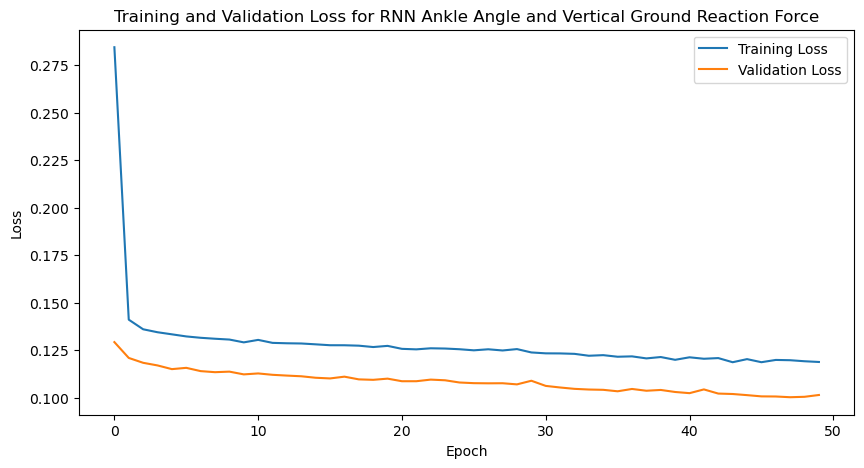

In [38]:
train_loss = model.history['loss']
val_loss = model.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for RNN Ankle Angle and Vertical Ground Reaction Force')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

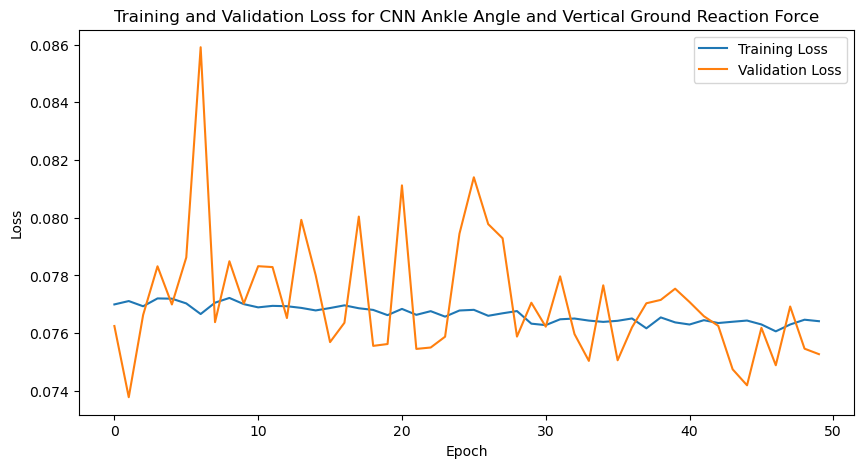

In [39]:
train_loss = fit.history['loss']
val_loss = fit.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for CNN Ankle Angle and Vertical Ground Reaction Force')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()